# Pair Visualización

In [97]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

En este pair programming usaremos el csv que generamos en el pair programming de ayer, el de la gestión de nulos. A lo largo de este ejercicio plantearemos una serie de preguntas que tendrás que contestar usando la visualización (podréis usar tanto Seaborn como Matplotlib).

In [98]:
df = pd.read_csv('world_data_full_apply_nulos.csv', index_col = 0)

¿Cómo se distribuye la tasa de natalidad en el conjunto de datos? ¿Hay algún patrón evidente?

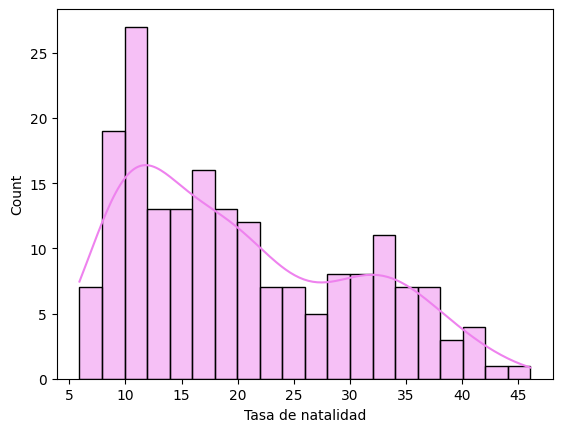

In [99]:


# En este caso seguimos haciendo la misma gráfica, pero le hemos añadido el 'kde' que no es más que una línea que nos muestra el patrón que siguen nuestros datos
# y hemos añadido los 'bins' que lo que hace es añadir el número de barras en nuestra visualización que le indicamos
sns.histplot(x = "birth_rate", 
             data = df, 
             color = "violet", 
             kde = True, 
             bins = 20 )

plt.xlabel("Tasa de natalidad");


¿Existe una relación aparente entre la tasa de mortalidad infantil y la esperanza de vida? Proporciona una breve descripción de los patrones que observes.

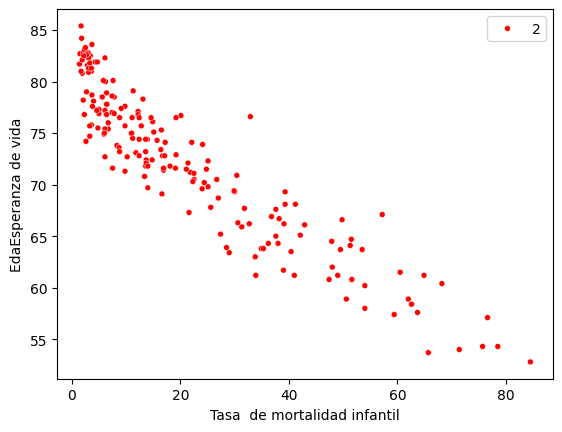

In [101]:
# creamos una gráfica básica usando 'sns.scatterplot()' 

# como ya lo hemos aprendido, vamos a cambiar el nombre de los ejes usando los métodos 'plt.xlabel()'  y 'plt.ylabel()' 

sns.scatterplot(x = "infant_mortality", 

                y = "life_expectancy", 

                data = df,

                color = "red",

                size = 2)

# cambiamos los nombres de los ejes

plt.xlabel("Tasa  de mortalidad infantil")

plt.ylabel("EdaEsperanza de vida");

Vemos una relación negativa: a mayor esperanza de vida, menor tasa de mortalidad infantil.




¿Cuál es el continente con la mayor cantidad de países en el conjunto de datos? Proporciona el porcentaje de países en ese continente.

In [102]:
df['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Central America', 'South America',
       'Oceania', 'North America', nan], dtype=object)

''

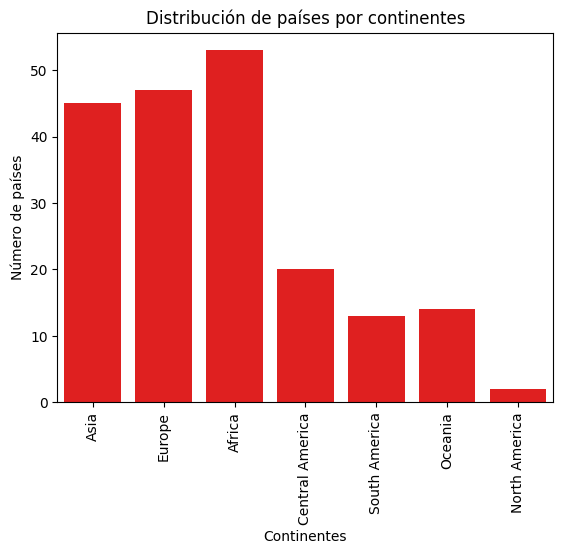

In [103]:
# Elegimos un gráfico de tipo countplot para mostrar la frecuencia de observaciones de diferentes categorías

sns.countplot(x = "continent", 
              data = df, 
              color = "red",
              order=['Asia', 'Europe', 'Africa', 'Central America', 'South America','Oceania', 'North America'])

# Giramos las etiquetas del eje x a 90º

plt.xticks(rotation=90)
plt.xlabel("Continentes")
plt.ylabel("Número de países")
plt.title("Distribución de países por continentes")
;

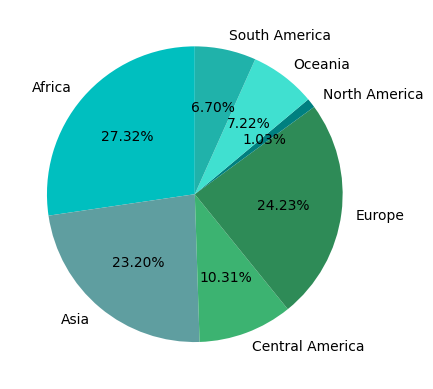

In [104]:
# La respuesta es África. Pero esto no nos da el porcentaje, para eso mejor usamos pieplot 

# lo primero que vamos a hacer es definir una lista para definir los colores que queremos para cada una de las categorías. 
# Esta lista debe tener tantos elementos como categorías tenemos en la columna de estudio (en este caso 7)

df_continentes = df.groupby("continent")["country"].count().reset_index()

colores = ["c", "cadetblue", "mediumseagreen", "seagreen", "teal", "turquoise", "lightseagreen"]

# creamos el gráfico basándonos en el DataFrame que hemos creado en el paso anterior
plt.pie("country", labels= "continent",
        data = df_continentes, 
        autopct=  '%1.2f%%', 
        colors = colores, 
        textprops={'fontsize': 10}, 
        startangle=90);

¿Cuál es la mediana de la esperanza de vida en Europa? Proporciona un rango intercuartil aproximado y verifica si existen valores atípicos.

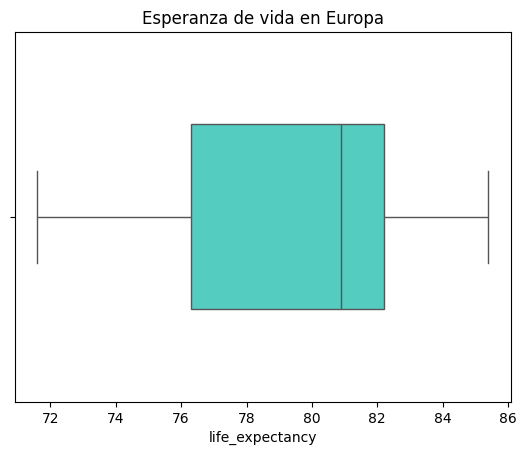

In [105]:
# Habria que filtrar por Europa

condicion = df["continent"] == 'Europe'
df_europa = df[condicion]

sns.boxplot(x = "life_expectancy", 
            data = df_europa, 
            width = 0.5, 
            color = "turquoise") 


plt.title("Distribución de países por continentes")

plt.title("Esperanza de vida en Europa");

In [106]:
# Interpretamos los datos: la mediana es un valor cercano al 81. El rango intercuartil está entre 76 y 83. No  existen valores atípicos. 

¿Existen relaciones visibles entre la tasa de natalidad y las siguientes variables: tasa de mortalidad infantil, esperanza de vida, densidad de población y población urbana? Usa un subplot. Describe cualquier patrón que encuentres.

''

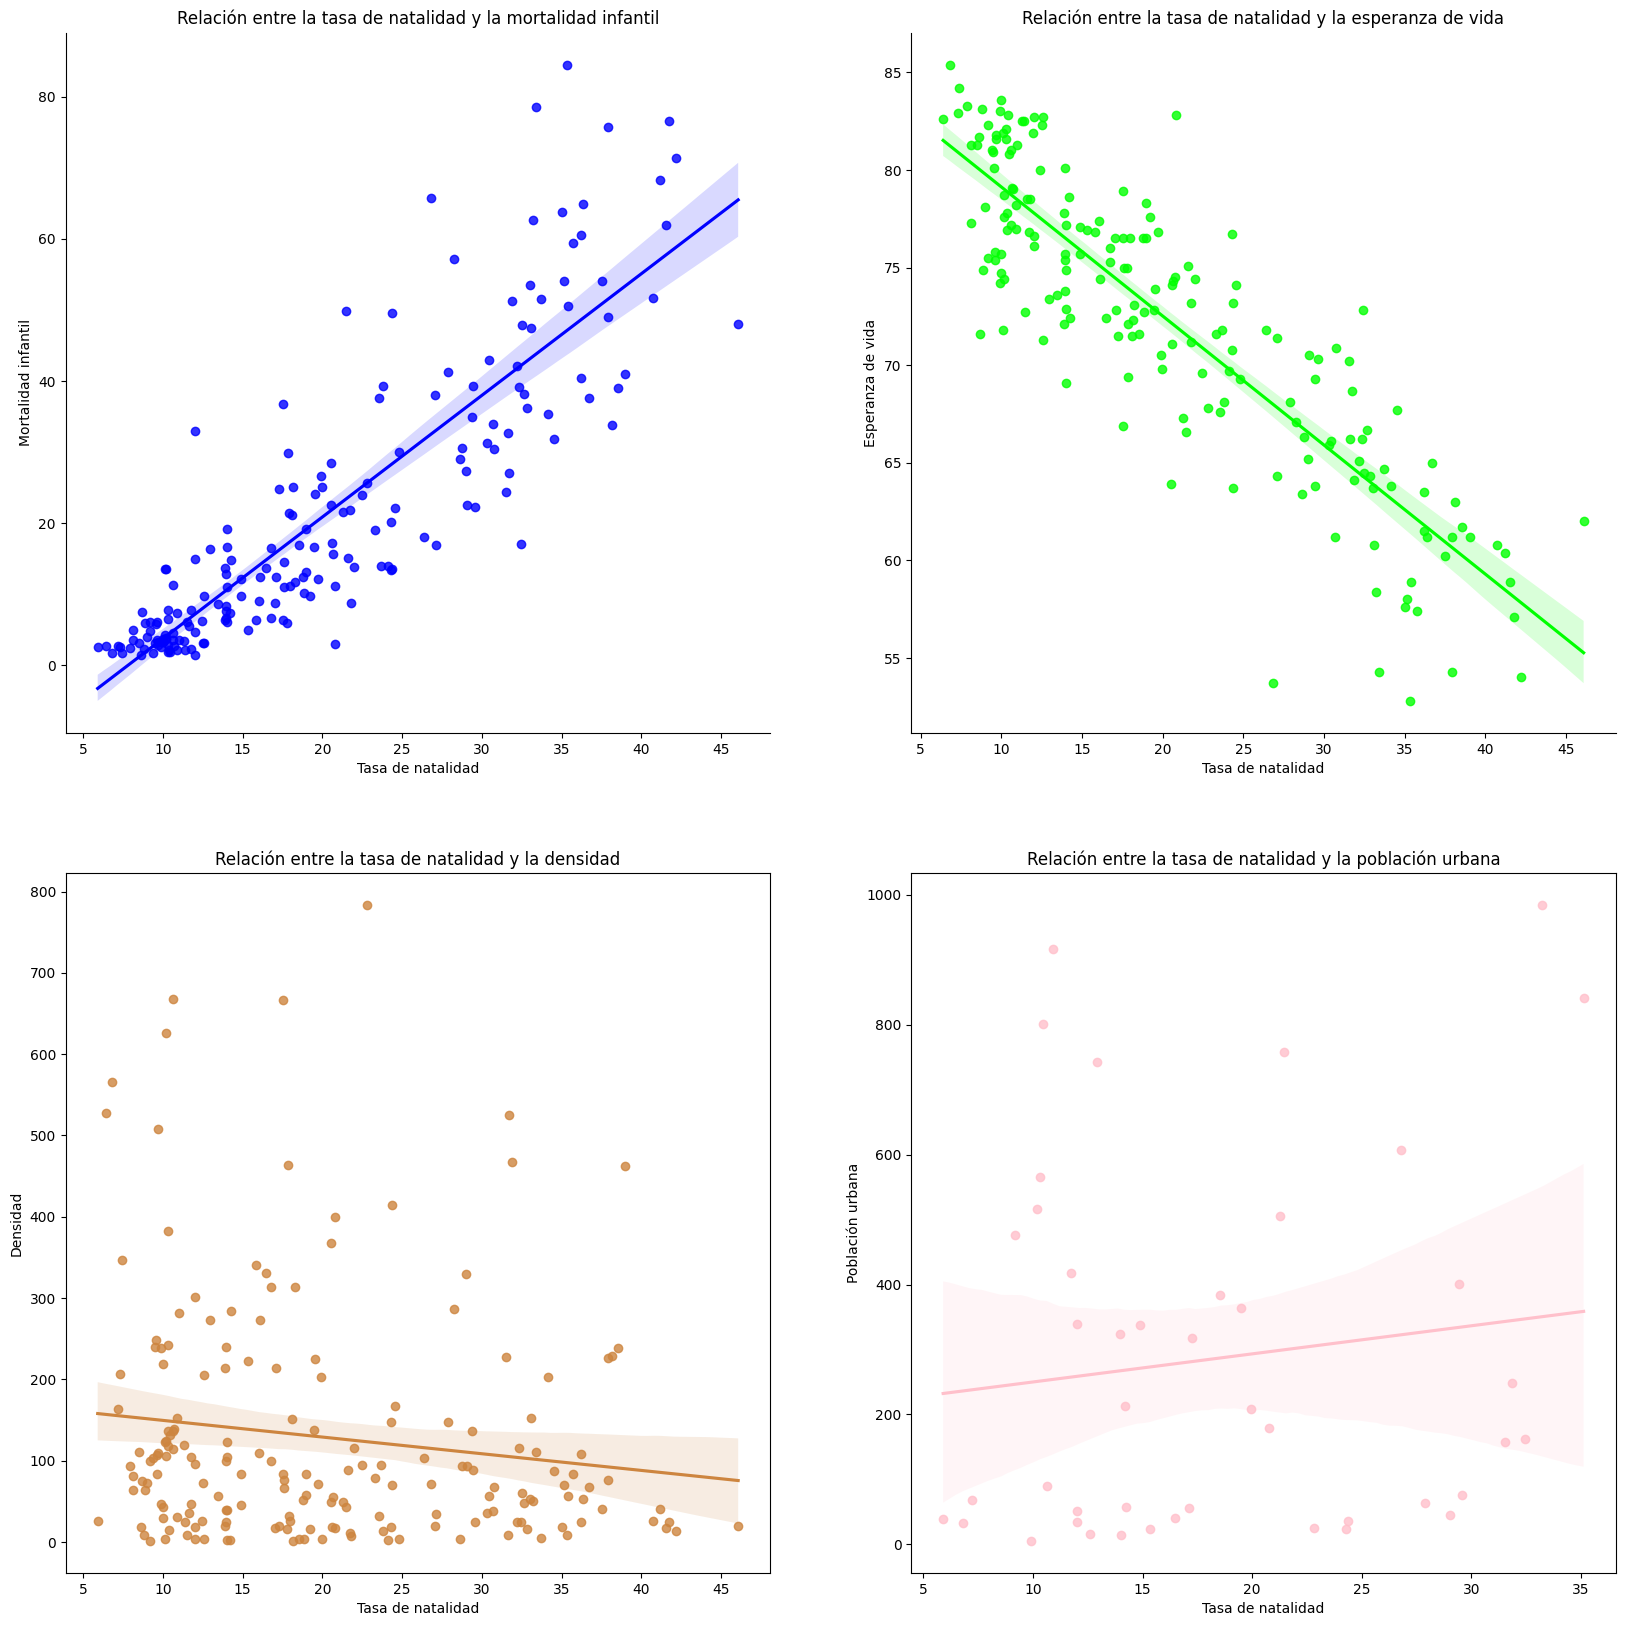

In [107]:
# Queremos comparar variables numéricas entre sí:  

# 'birth_rate', 'infant_mortality', 'life_expectancy', 'density', 'urban_population'

# Quiero un subplot de 2x2.

fig, axes = plt.subplots(nrows=2, ncols=2, figsize = (20, 20)) 

sns.regplot(x='birth_rate',
            y='infant_mortality', 
            color='blue',
            data=df,
            ax = axes[0][0])

axes[0][0].set_title("Relación entre la tasa de natalidad y la mortalidad infantil")
axes[0][0].set_xlabel("Tasa de natalidad")
axes[0][0].set_ylabel("Mortalidad infantil")
axes[0][0].spines['right'].set_visible(False)
axes[0][0].spines['top'].set_visible(False)

sns.regplot(x='birth_rate',
            y='life_expectancy', 
            color='lime',
            data=df,
            ax = axes[0][1])

axes[0][1].set_title("Relación entre la tasa de natalidad y la esperanza de vida")
axes[0][1].set_xlabel("Tasa de natalidad")
axes[0][1].set_ylabel("Esperanza de vida")
axes[0][1].spines['right'].set_visible(False)
axes[0][1].spines['top'].set_visible(False)

sns.regplot(x='birth_rate',
            y='density', 
            color='peru',
            data=df,
            ax = axes[1][0])

axes[1][0].set_title("Relación entre la tasa de natalidad y la densidad")
axes[1][0].set_xlabel("Tasa de natalidad")
axes[1][0].set_ylabel("Densidad")

sns.regplot(x='birth_rate',
            y='urban_population', 
            color='pink',
            data=df,
            ax = axes[1][1])

axes[1][1].set_title("Relación entre la tasa de natalidad y la población urbana")
axes[1][1].set_xlabel("Tasa de natalidad")
axes[1][1].set_ylabel("Población urbana")

;

In [108]:
# CONCLUSIONES: 
# 
# Hay una fuerte relación positiva entre tasa de natalidad y mortalidad infantil.
# Hay una fuerte relación negativa entre tasa de natalidad y esperanza de vida.
# Hay una débil relación negativa entre  tasa de natalidad y densidad.
# Hay una débil relación positiva entre tasa de natalidad y población urbana.


¿Cuáles son los 10 países con la mayor área forestal?

In [115]:
# Primeramente, agrupamos el total de área forestal por países y ordenamos de mayor a menor área forestal.

df_forested_ordenador = df.groupby(by='country')['forested_area'].sum().reset_index().sort_values('forested_area', ascending=False)

''

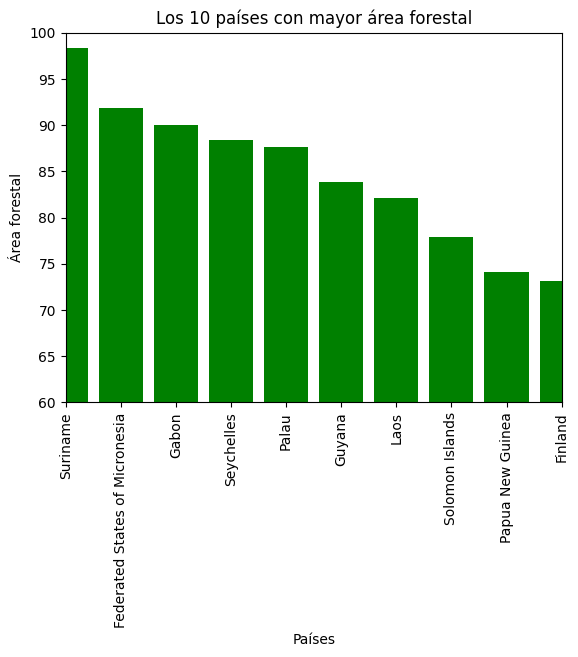

In [126]:
# Creamos nuestra gráfica

plt.bar(x = "country", 
            height=  'forested_area', 
            data = df_forested_ordenador,
            color = "green")

plt.xticks(rotation = 90) # Rotamos las etiquetas de los países

plt.title("Los 10 países con mayor área forestal")
plt.xlabel("Países")
plt.ylabel("Área forestal")

# Para limitar y solo quedarmos con los 10 países con mayor área forestal

plt.ylim([60, 100])
plt.xlim([0, 9])
;



Requisitos que deben cumplir las gráficas (en caso de usar alguna de ellas):

Todas deben llevar título.

Los nombres de los ejes deben estar en castellano.

En los scatterplot los puntos deben tener un tamaño de 2.

En los scatterplot los puntos deben tener un color diferente al azul.

En los barplot las barras siempre tienen que estar ordenadas de mayor a menor.

En los barplot y countplot las barras tienen que tener un color diferente a los que vienen por defecto.

En los pieplot siempre tenemos que añadir la etiqueta de a que % corresponde cada quesito.